In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Importing Liabraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
%matplotlib inline

#### Loading the dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Advance ML/Hospital_Mortality_Prediction/mortality.csv")
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


### Data Analysis

In [4]:
df.shape

(1177, 51)

In [5]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [7]:
df.nunique()

,0
group,2
ID,1177
outcome,2
age,68
gendera,2
BMI,933
hypertensive,2
atrialfibrillation,2
CHD with no MI,2
diabetes,2


In [8]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1

In [9]:
df.isnull().sum()

,0
group,0
ID,0
outcome,1
age,0
gendera,0
BMI,215
hypertensive,0
atrialfibrillation,0
CHD with no MI,0
diabetes,0


### Handling NAN Values

##### 1) For Float variables

In [10]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy="mean")

In [11]:
float_col = df.select_dtypes(include="float64").columns

In [12]:
si.fit(df[float_col])

SimpleImputer()

In [13]:
df[float_col] = si.transform(df[float_col])

In [14]:
x = df.drop(columns = "outcome")

y = df[["outcome"]]

In [15]:
# Rechecking if there are any null values present or not

df.isnull().sum()

,0
group,0
ID,0
outcome,0
age,0
gendera,0
BMI,0
hypertensive,0
atrialfibrillation,0
CHD with no MI,0
diabetes,0


##### 2) For Dependant Variables

In [16]:
SI = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [17]:
SI.fit_transform(y)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
y = pd.DataFrame(y, columns=["outcome"], dtype="int64")

In [19]:
df_final = x.copy()

df_final["outcome"] = y

In [20]:
df_final.isnull().sum()

,0
group,0
ID,0
age,0
gendera,0
BMI,0
hypertensive,0
atrialfibrillation,0
CHD with no MI,0
diabetes,0
deficiencyanemias,0


### Visualising our Dependant variable

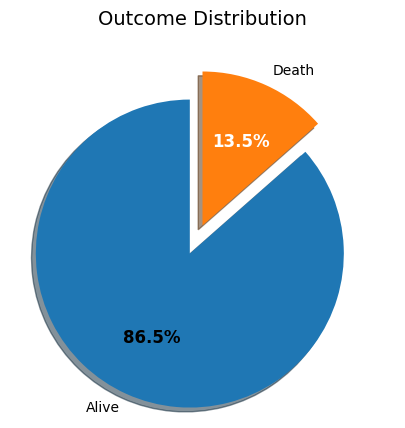

In [21]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final["outcome"].value_counts(),
                                   autopct = "%1.1f%%",
                                   shadow=True,
                                   startangle=90,
                                   explode=(0.2, 0),
                                   labels=["Alive", "Death"])

plt.setp(autotexts, size=12, color = "black", weight = 'bold')
autotexts[1].set_color("white");

plt.title("Outcome Distribution", fontsize=14)
plt.show()

In [22]:
import plotly.express as px
fig = px.histogram(df, x = "age", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [23]:
fig = px.histogram(df, x = "BMI", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [24]:
fig = px.histogram(df, x = "SP O2", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [25]:
fig = px.histogram(df, x = "heart rate", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

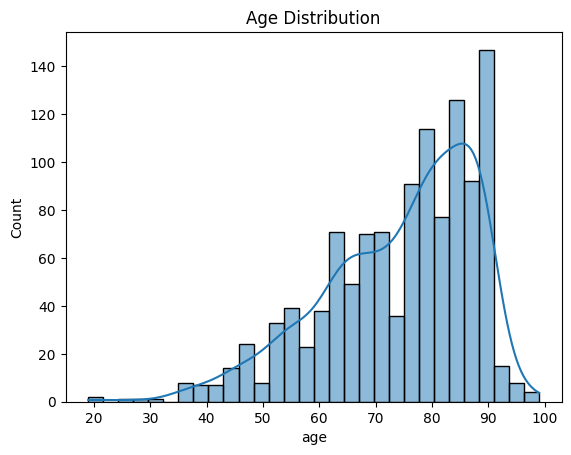

In [26]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [27]:
df_final["gendera"].value_counts()

,count
gendera,
2,618
1,559


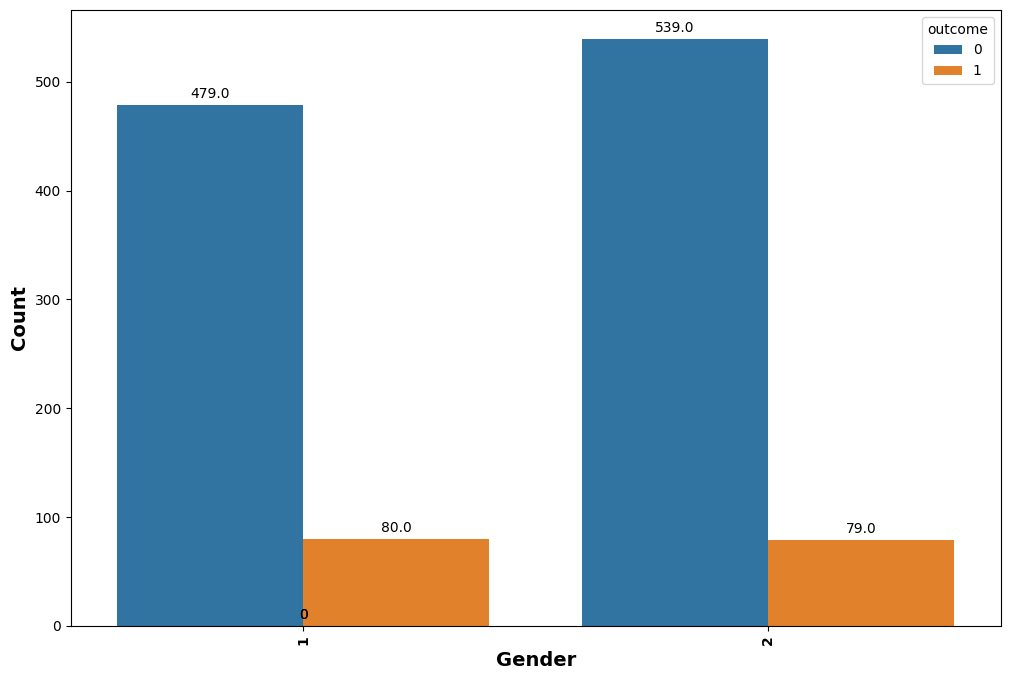

In [28]:
plt.figure(figsize=(12,8))

plot = sns.countplot(x="gendera", hue="outcome", data=df_final)

# Axis labels
plt.xlabel("Gender", fontsize=14, weight="bold")
plt.ylabel("Count", fontsize=14, weight="bold")

# Automatic xticks instead of np.arange(2)
plt.xticks(rotation="vertical", weight="bold")

# Adding annotations for bar heights
for i in plot.patches:
    plot.annotate(format(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha="center", va="center",
                  size=10, xytext=(0,8),
                  textcoords = "offset points")

plt.show()

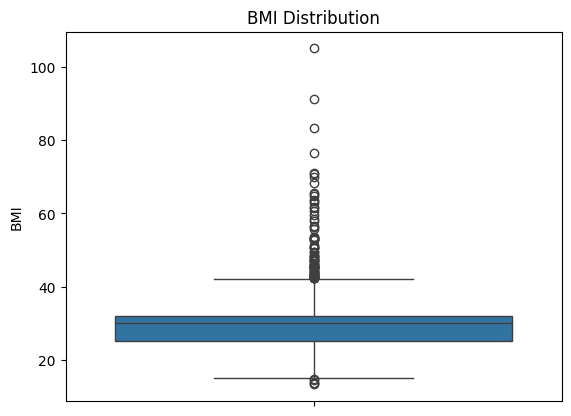

In [29]:
sns.boxplot(y=df['BMI'])
plt.title("BMI Distribution")
plt.show()

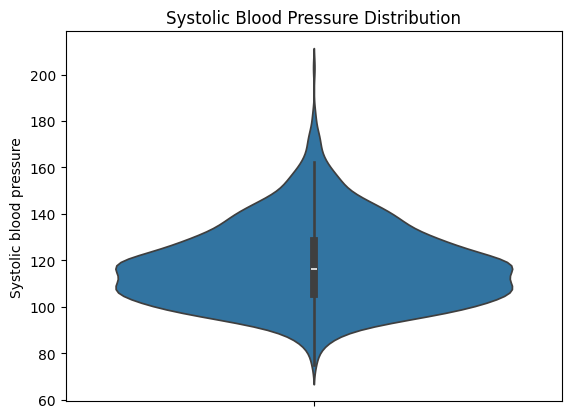

In [30]:
sns.violinplot(y=df['Systolic blood pressure'])
plt.title("Systolic Blood Pressure Distribution")
plt.show()

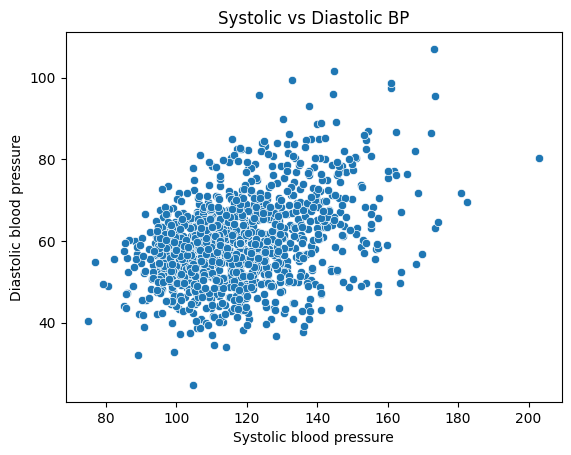

In [31]:
sns.scatterplot(x=df['Systolic blood pressure'], y=df['Diastolic blood pressure'])
plt.title("Systolic vs Diastolic BP")
plt.show()

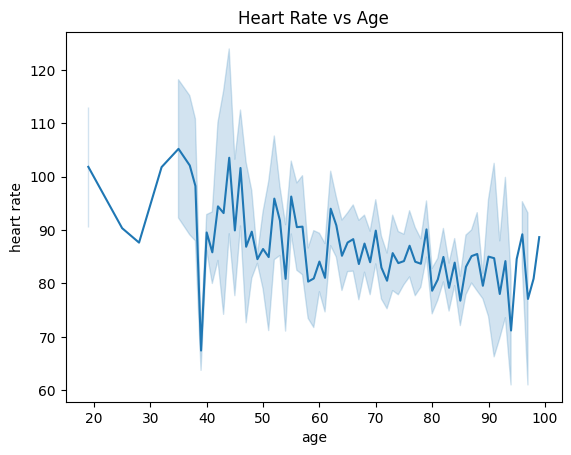

In [32]:
sns.lineplot(x=df['age'], y=df['heart rate'])
plt.title("Heart Rate vs Age")
plt.show()

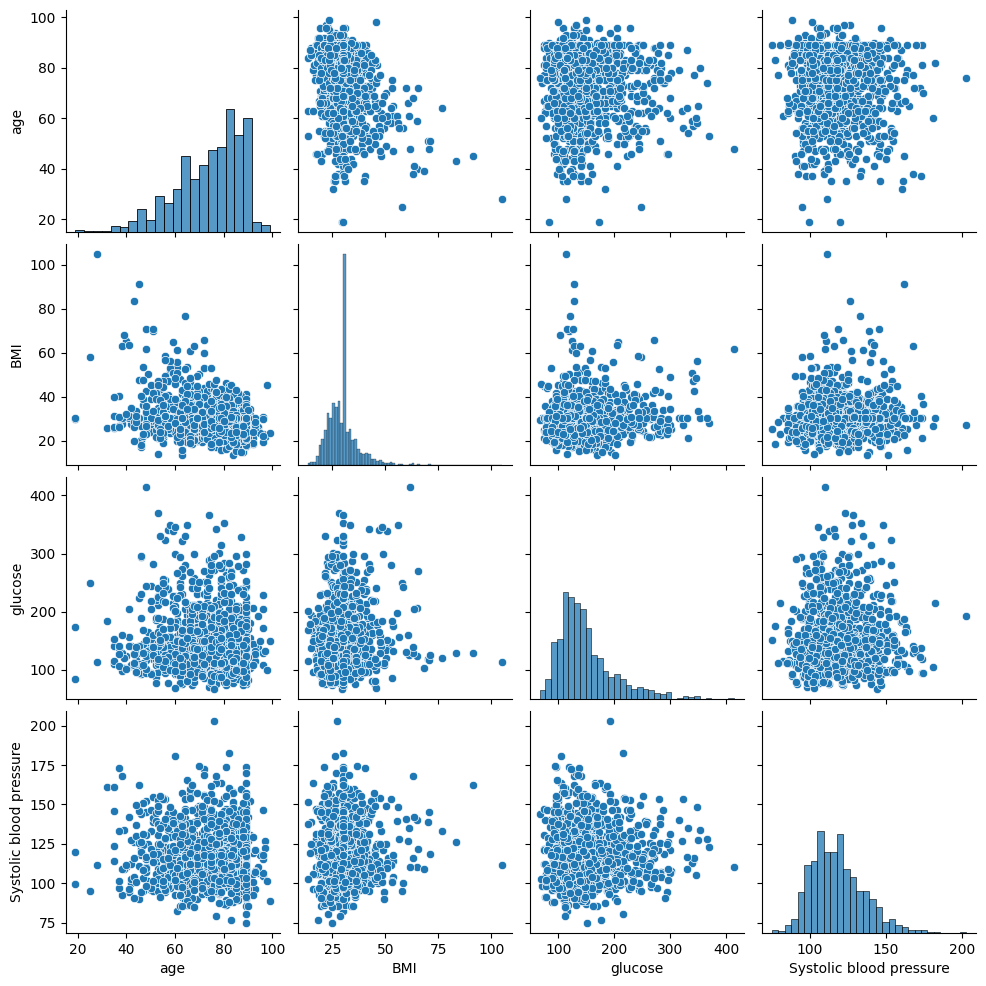

In [33]:
sns.pairplot(df[['age', 'BMI', 'glucose', 'Systolic blood pressure']])
plt.show()

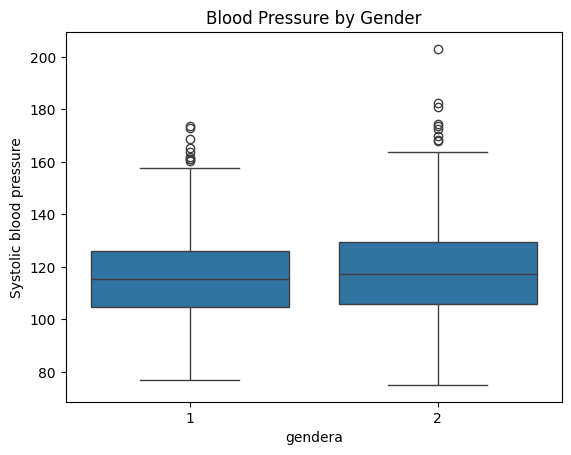

In [34]:
sns.boxplot(x=df['gendera'], y=df['Systolic blood pressure'])
plt.title("Blood Pressure by Gender")
plt.show()

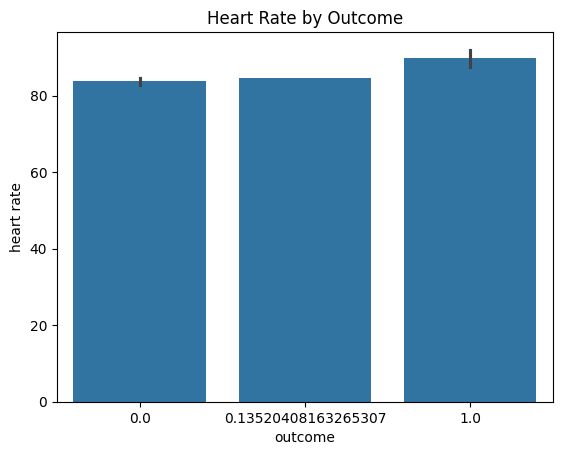

In [35]:
sns.barplot(x=df['outcome'], y=df['heart rate'])
plt.title("Heart Rate by Outcome")
plt.show()

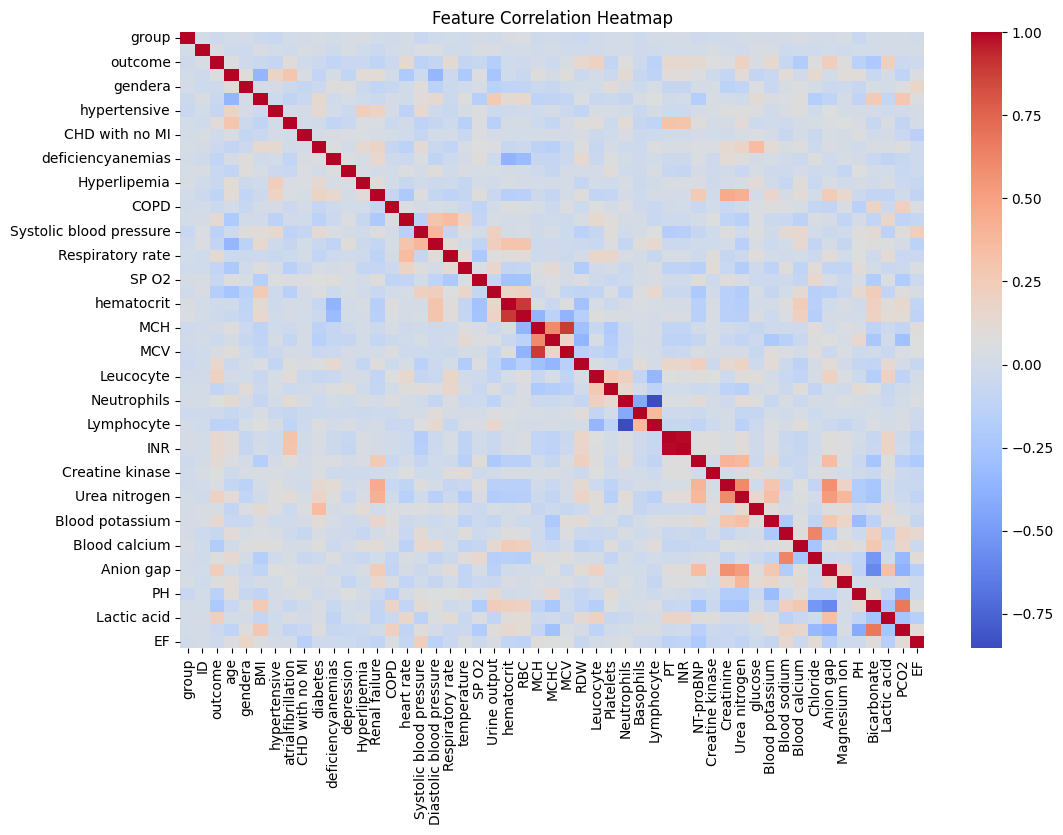

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

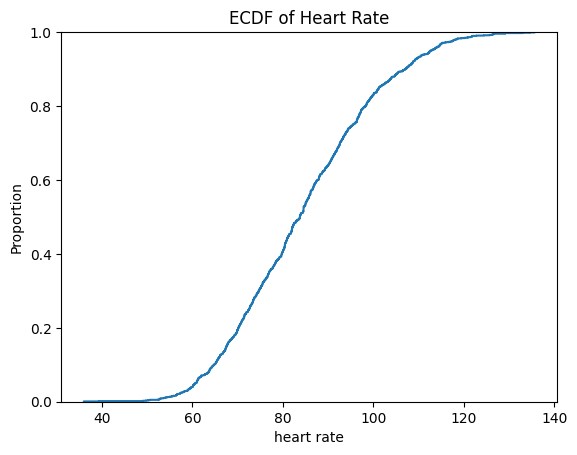

In [37]:
sns.ecdfplot(df['heart rate'])
plt.title("ECDF of Heart Rate")
plt.show()

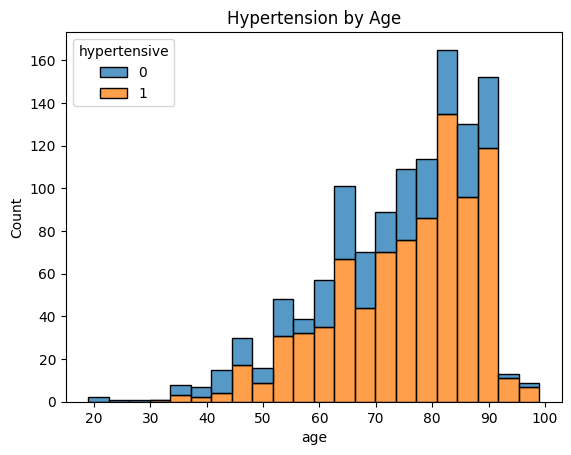

In [38]:
sns.histplot(df, x="age", hue="hypertensive", multiple="stack")
plt.title("Hypertension by Age")
plt.show()

### Correlation

In [39]:
col = ["group", "gendera", "hypertensive", "atrialfibrillation", "CHD with no MI", "diabetes", "deficiencyanemias", "depression", "Hyperlipemia", "Renal failure", "COPD", "outcome"]

In [40]:
corr = df_final[col].corr()

<Axes: >

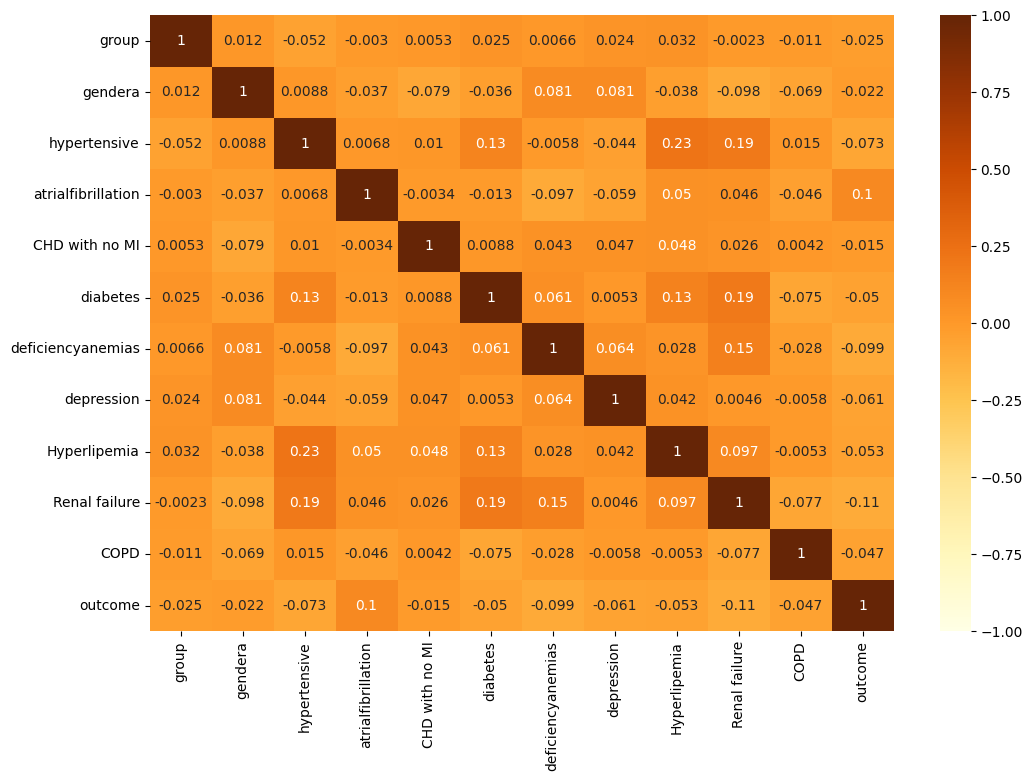

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlOrBr", vmax=1.0, vmin=-1.0)

### Data Preprocessing

##### Splitting our Data

In [42]:
x = df_final.drop(columns="outcome")
y = df_final[["outcome"]]

### Standardizing our data

In [43]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scaled = scale.fit_transform(x)

final_x = pd.DataFrame(scaled, columns = x.columns)

final_x.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.653197,-0.886597,-0.153051,-1.051449,8.781267e-01,-1.595362,-0.906632,-0.306376,1.171744,1.396379,-0.36743,1.277932,1.318032,-0.286010,-0.988373,2.196509,0.829513,-1.050459,0.061423,0.928881,0.204219,-1.084885,-0.981552,-0.492730,-0.959065,-0.000584,0.125718,-0.585966,0.562432,-5.240843e-01,-0.013569,0.132057,-0.939933,-0.756705,-0.689194,-0.071794,0.246647,0.627297,-0.668798,1.543483,-0.033742,-1.814098,1.289532,-0.286026,1.980755,-2.545867,-1.112245,-1.533672,-0.503052,0.488583
1,-0.653197,-0.377851,0.070357,0.951068,8.431822e-16,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,-0.36743,-0.782514,-0.758707,3.496387,1.054724,1.276261,0.515262,0.012651,0.008722,0.284629,-0.378753,-0.218084,-0.697465,0.580632,-0.859187,1.270501,-0.794152,0.387791,0.043297,-1.363160e-15,0.000000,0.000000,0.000000,0.000000,-0.656629,-0.135318,-0.407021,-0.730927,-0.025384,0.659224,-0.000272,-0.591830,-0.719329,-0.935527,-0.925400,-2.631567,1.264720,-1.533672,2.950362,0.488583
2,-0.653197,-1.412399,0.666111,0.951068,-4.290589e-01,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,-0.36743,-0.782514,1.318032,-0.286010,-0.769802,1.005600,0.173514,0.713348,-0.371168,-0.429557,0.419838,-0.810404,-1.524190,1.825886,-1.116016,3.046958,3.692558,-1.001103,-0.329915,-1.152386e+00,0.351887,1.518254,-0.847730,-0.817196,-0.527512,-0.167734,0.178705,-0.111769,0.003984,3.975195,0.439627,-0.409649,0.669477,-1.480271,0.147056,-1.894540,0.708507,-1.533672,2.359646,-1.066269
3,-0.653197,-0.695710,-2.312661,0.951068,6.298430e+00,-1.595362,-0.906632,-0.306376,-0.853429,-0.716138,-0.36743,-0.782514,-0.758707,-0.286010,0.623253,0.487478,1.288319,0.265293,-0.647851,-1.062362,5.478914,0.908382,1.121170,-1.328311,-1.749173,-0.655269,0.509388,-0.475964,-0.222241,1.617714e-01,-0.622663,0.280578,1.309368,1.259674,-0.787192,-0.117584,-0.826461,-0.962021,-0.402266,0.506488,-0.093989,1.707012,-1.913344,-0.591321,-0.705227,-0.146241,2.257299,-1.420354,2.677724,0.488583
4,-0.653197,-0.430293,0.070357,0.951068,1.942067e-01,0.626817,-0.906632,-0.306376,-0.853429,1.396379,-0.36743,-0.782514,1.318032,3.496387,-1.046015,2.236721,-0.133352,0.140355,0.140475,1.316424,2.040978,-0.380908,-0.460194,0.430387,0.572402,0.167873,0.147619,-0.359585,0.083979,-1.363160e-15,0.000000,0.000000,0.000000,0.000000,1.505573,-0.098202,0.240132,0.306817,-0.059646,1.463096,-0.535801,0.406521,0.415209,0.468234,-1.870013,-2.203063,-0.950913,-1.420354,0.405741,0.488583


In [44]:
y.head()

,outcome
0,0
1,0
2,0
3,0
4,0


### Train_Test_Split

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=123)

In [46]:
print(x_train.shape, x_test.shape)

(823, 50) (354, 50)


In [47]:
# x_train.drop(columns = "ID", inplace=True)

In [48]:
from sklearn.svm import SVC
from sklearn import svm

svc_model = svm.SVC()

svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [49]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,
                             roc_auc_score)


cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[301   0]
 [ 53   0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       301
           1       0.00      0.00      0.00        53

    accuracy                           0.85       354
   macro avg       0.43      0.50      0.46       354
weighted avg       0.72      0.85      0.78       354

Accuracy of the model:  0.8502824858757062


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Logistic regression

In [50]:
# Creating a model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

#fitting training data to the model

classifier.fit(x_train, y_train)

Y_pred=classifier.predict(x_test)
print(Y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [51]:
cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[297   4]
 [ 50   3]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       301
           1       0.43      0.06      0.10        53

    accuracy                           0.85       354
   macro avg       0.64      0.52      0.51       354
weighted avg       0.79      0.85      0.79       354

Accuracy of the model:  0.847457627118644


### XGBoost Clsssifier

In [52]:
# Initialize XGBoost Classifier

import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(x_train, y_train)

# Predictions
y_pred1 = xgb_classifier.predict(x_test)

In [53]:
cfm=confusion_matrix(y_test,y_pred1)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred1))

acc=accuracy_score(y_test, y_pred1)
print("Accuracy of the model: ",acc)

[[296   5]
 [ 38  15]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       301
           1       0.75      0.28      0.41        53

    accuracy                           0.88       354
   macro avg       0.82      0.63      0.67       354
weighted avg       0.87      0.88      0.85       354

Accuracy of the model:  0.8785310734463276


### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model = model.fit(x_train, y_train)

y_pred2 = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [55]:
cfm=confusion_matrix(y_test,y_pred2)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred2))

acc=accuracy_score(y_test, y_pred2)
print("Accuracy of the model: ",acc)

[[300   1]
 [ 46   7]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       301
           1       0.88      0.13      0.23        53

    accuracy                           0.87       354
   macro avg       0.87      0.56      0.58       354
weighted avg       0.87      0.87      0.82       354

Accuracy of the model:  0.867231638418079


#### Using PyCaret

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Advance ML/Hospital_Mortality_Prediction/mortality.csv")

In [57]:
# !pip install pycaret

In [58]:
from pycaret.classification import *

In [60]:
df_final.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
0,1,125047,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,0
1,1,139812,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.113544,0.405569,12.233024,17.481057,1.625465,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,0
2,1,109787,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,0
3,1,130587,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0
4,1,138290,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.113544,0.405569,12.233024,17.481057,1.625465,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,0


In [61]:
model = setup(data = df_final, target="outcome")

,Description,Value
0,Session id,8973
1,Target,outcome
2,Target type,Binary
3,Original data shape,"(1177, 51)"
4,Transformed data shape,"(1177, 51)"
5,Transformed train set shape,"(823, 51)"
6,Transformed test set shape,"(354, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


In [62]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8784,0.7743,0.1788,0.5300,0.2542,0.2213,0.2626,0.0350
et,Extra Trees Classifier,0.8736,0.7938,0.0803,0.5167,0.1366,0.1188,0.1824,0.3460
lightgbm,Light Gradient Boosting Machine,0.8736,0.7743,0.1621,0.6417,0.2518,0.2100,0.2714,2.0710
rf,Random Forest Classifier,0.8712,0.7809,0.0811,0.5083,0.1338,0.1130,0.1715,0.4800
gbc,Gradient Boosting Classifier,0.8712,0.7885,0.2250,0.4922,0.3010,0.2486,0.2722,0.7890
lda,Linear Discriminant Analysis,0.8688,0.7737,0.2871,0.4781,0.3528,0.2912,0.3035,0.0510
xgboost,Extreme Gradient Boosting,0.8675,0.7642,0.1886,0.5367,0.2605,0.2103,0.2496,0.2470
lr,Logistic Regression,0.8664,0.7402,0.1076,0.3600,0.1576,0.1240,0.1473,1.1610
dummy,Dummy Classifier,0.8651,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0310
nb,Naive Bayes,0.8555,0.7248,0.2788,0.4419,0.3332,0.2594,0.2714,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=8973, solver='auto',
                tol=0.0001)

In [63]:
ridge = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8675,0.7121,0.1818,0.5000,0.2667,0.2109,0.2439
1,0.8916,0.9293,0.2727,0.7500,0.4000,0.3544,0.4098
2,0.8554,0.7453,0.1667,0.5000,0.2500,0.1916,0.2274
3,0.8902,0.7490,0.2727,0.7500,0.4000,0.3538,0.4092
4,0.8902,0.8630,0.1818,1.0000,0.3077,0.2779,0.4017
5,0.8415,0.7478,0.0909,0.2500,0.1333,0.0665,0.0770
6,0.8902,0.7772,0.1818,1.0000,0.3077,0.2779,0.4017
7,0.8780,0.7503,0.1818,0.6667,0.2857,0.2421,0.3045
8,0.8537,0.7631,0.0000,0.0000,0.0000,-0.0229,-0.0437


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
pred = predict_model(ridge, data=x_test)

In [65]:
pred

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,prediction_label,prediction_score
774,1,135043,88,2,22.819490,1,1,0,1,0,...,101.333336,15.777778,2.162500,7.378532,30.000000,1.853426,45.535381,75,0,1.0000
1048,2,102028,54,2,21.349905,1,0,1,1,1,...,97.461540,15.384615,2.018182,7.380000,23.769230,2.450000,35.000000,55,0,0.9991
72,1,103673,82,1,21.114758,1,0,0,0,0,...,104.199997,11.700000,2.140000,7.423333,33.200001,0.980000,47.333332,35,0,0.9999
319,1,163520,51,2,42.125278,1,0,0,1,0,...,107.000000,11.200000,1.812500,7.348333,25.299999,1.583333,47.666668,75,0,0.9998
1085,2,132082,75,1,25.777517,1,1,0,1,0,...,103.642860,16.500000,2.166667,7.310000,20.666666,3.350000,45.535381,30,0,0.9979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,157104,55,1,22.693602,1,0,0,1,1,...,99.375000,21.937500,2.228571,7.313334,18.470589,1.605263,36.411766,20,1,0.9912
1102,2,113423,72,1,27.409054,1,0,0,1,0,...,102.800003,12.777778,2.028571,7.378532,27.700001,1.853426,45.535381,55,0,1.0000
388,1,167883,53,2,21.136761,1,0,0,1,1,...,106.043480,20.739130,2.390000,7.315714,20.260870,1.711111,37.384617,20,0,0.9955
367,1,154406,66,2,39.560421,0,0,0,0,0,...,99.000000,13.600000,2.280000,7.440000,31.600000,1.700000,50.000000,55,0,0.9997


In [70]:
df1 = pd.read_csv("/content/drive/MyDrive/Advance ML/Hospital_Mortality_Prediction/drinking_water_potability.csv")
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [71]:
df1.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [72]:
df1.shape

(3276, 10)

In [73]:
model = setup(data = df1, target="Potability")

,Description,Value
0,Session id,8682
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(3276, 10)"
4,Transformed data shape,"(3276, 10)"
5,Transformed train set shape,"(2293, 10)"
6,Transformed test set shape,"(983, 10)"
7,Numeric features,9
8,Rows with missing values,38.6%
9,Preprocess,True


In [74]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6721,0.6794,0.3321,0.6534,0.4380,0.2427,0.2701,0.0250
rf,Random Forest Classifier,0.6629,0.6608,0.3410,0.6225,0.4387,0.2282,0.2492,0.9330
et,Extra Trees Classifier,0.6573,0.6642,0.2908,0.6294,0.3951,0.2017,0.2308,0.6030
gbc,Gradient Boosting Classifier,0.6542,0.6372,0.2604,0.6414,0.3692,0.1865,0.2228,1.0420
lightgbm,Light Gradient Boosting Machine,0.6468,0.6504,0.4125,0.5633,0.4746,0.2193,0.2256,0.7310
nb,Naive Bayes,0.6241,0.5932,0.2314,0.5434,0.3236,0.1192,0.1400,0.0240
ada,Ada Boost Classifier,0.6193,0.5643,0.2292,0.5331,0.3190,0.1095,0.1294,0.2130
xgboost,Extreme Gradient Boosting,0.6189,0.6279,0.4013,0.5150,0.4500,0.1659,0.1692,0.3610
dummy,Dummy Classifier,0.6097,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210
ridge,Ridge Classifier,0.6092,0.4793,0.0011,0.1000,0.0022,-0.0004,-0.0023,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [75]:
Model = create_model("qda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6391,0.6634,0.2667,0.5854,0.3664,0.1609,0.1852
1,0.6348,0.6054,0.2556,0.5750,0.3538,0.1489,0.1727
2,0.6565,0.6092,0.3000,0.6279,0.4060,0.2048,0.2325
3,0.6900,0.7407,0.3222,0.7436,0.4496,0.2781,0.3252
4,0.6245,0.6174,0.2444,0.5500,0.3385,0.1274,0.1479
5,0.6769,0.6806,0.3034,0.6923,0.4219,0.2425,0.2822
6,0.7642,0.7774,0.5056,0.8182,0.6250,0.4667,0.4954
7,0.6594,0.6728,0.3146,0.6222,0.4179,0.2123,0.2370
8,0.6769,0.7189,0.3596,0.6531,0.4638,0.2594,0.2830


Processing:   0%|          | 0/4 [00:00<?, ?it/s]